# Reto: Deserción de empleados

## Objetivo: 
 
A través de este reto vas a lograr: 
 
Evaluar las características de un conjunto de datos con el fin de ver si son suficientes para la actividad en la que serán usados. 
Crear nuevas características a partir de las existentes, que logren proporcionar una mayor información para la actividad en la que se usarán. 
Eliminar las características que sean irrelevantes para el uso que se le dará al conjunto de datos.

## Introducción: 
 
Una empresa de productos médicos está interesada en atraer y mantener al mejor talento porque sabe que es la clave del éxito para cualquier organización. También toma en cuenta que, si un empleado abandona la empresa, se está provocando una pérdida de tiempo y dinero debido, entre otras cosas, a la inversión en capacitación y a la experiencia acumulada del empleado. Desde luego que hay algunas formas de deserción que son inevitables, como cuando un empleado se retira o cambia de ciudad de residencia. Sin embargo, existen algunos factores que se pueden controlar por parte de la empresa con el objetivo de minimizar la deserción al mejorar las condiciones de trabajo. A la empresa le interesa saber cuáles son los factores que hacen que un empleado siga con ellos y cuáles son los que se deben cambiar debido a que provocan que los empleados se vayan. 
 
Aunque la empresa sabe que este estudio tiene muchas aristas desea empezar con algo muy simple: determinando si un empleado abandonará la empresa Attrition o no en un momento dado. Como se trata de un problema de clasificación binaria, lo más probable es que utilicen un modelo de machine learning. La empresa ha logrado recolectar 30 datos de 400 de sus empleados, pero no está segura si ese conjunto de datos sean los correctos para lo que pretende hacer, por lo que decidió contratarte como científico de datos para generar un set de datos adecuado para esta actividad. 

## Desarrollo

1. Importa las librerías requeridas.

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


2. Lee el archivo CSV llamado empleadosRETO.csv y coloca los datos en un frame de Pandas llamado EmpleadosAttrition.

In [93]:
EmpleadosAttrition = pd.read_csv('/Users/jvmx/Documents/TLG/Archivos/Datos/SC15empleadosRETO.csv')
display(EmpleadosAttrition.info())
display(EmpleadosAttrition.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       400 non-null    int64 
 1   BusinessTravel            396 non-null    object
 2   Department                400 non-null    object
 3   DistanceFromHome          400 non-null    object
 4   Education                 400 non-null    int64 
 5   EducationField            400 non-null    object
 6   EmployeeCount             400 non-null    int64 
 7   EmployeeNumber            400 non-null    int64 
 8   EnvironmentSatisfaction   400 non-null    int64 
 9   Gender                    400 non-null    object
 10  JobInvolvement            400 non-null    int64 
 11  JobLevel                  400 non-null    int64 
 12  JobRole                   400 non-null    object
 13  JobSatisfaction           400 non-null    int64 
 14  MaritalStatus             

None

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,50,Travel_Rarely,Research & Development,1 km,2,Medical,1,997,4,Male,...,22,4,3,80,32,1,2,4,1,No
1,36,Travel_Rarely,Research & Development,6 km,2,Medical,1,178,2,Male,...,20,4,4,80,7,0,3,2,0,No
2,21,Travel_Rarely,Sales,7 km,1,Marketing,1,1780,2,Male,...,13,3,2,80,1,3,3,0,1,Yes
3,52,Travel_Rarely,Research & Development,7 km,4,Life Sciences,1,1118,2,Male,...,19,3,4,80,18,4,3,6,4,No
4,33,Travel_Rarely,Research & Development,15 km,1,Medical,1,582,2,Male,...,12,3,4,80,15,2,4,6,7,Yes


In [94]:
EmpleadosAttrition.HiringDate

0      06/06/2013
1      12/25/2015
2       2/14/2017
3       7/29/2010
4      10/07/2011
          ...    
395    05/09/2013
396    04/02/2016
397     1/21/2008
398     8/27/2018
399    02/08/2010
Name: HiringDate, Length: 400, dtype: object

3. Elimina las columnas que, con alta probabilidad (estimada por ti), no tienen relación alguna con la salida. <br>
Hay algunas columnas que contienen información que no ayuda a definir el desgaste de un empleado, tal es caso de las siguientes:

- EmployeeCount: número de empleados, todos tienen un 1
- EmployeeNumber: ID del empleado, el cual es único para cada empleado
- Over18: mayores de edad, todos dicen “Y”
- StandardHours: horas de trabajo, todos tienen “80”

In [95]:
def format_att_cats(df):
    df_ = df.copy()
    df_['DistanceFromHome'] = df_['DistanceFromHome'].str.replace(' km', '')
    df_['DistanceFromHome'] = pd.to_numeric(df_['DistanceFromHome'], errors='coerce')
    df_['Gender'] = df_['Gender'].map({'Male': 1, 'Female': 0})
    df_['MaritalStatus'] = df_['MaritalStatus'].map({'Divorced': 1, 'Single': 2, 'Married': 3}).fillna(0)
    df_['OverTime'] = df_['OverTime'].map({'Yes': 1, 'No': 0})
    df_['Department'] = df_['Department'].map({'Research & Development': 1, 'Sales': 2, 'Human Resources': 3})
    df_['Attrition'] = df_['Attrition'].map({'Yes': 1, 'No': 0})
    return df_

def run_att_corr(df_, y = 'Attrition' ,case=1):
    if case == 1:
        df_ = format_att_cats(df_)
    
    for column in df_.columns:
        if df_[column].dtype == 'object':
            try:
                df_[column] = pd.to_numeric(df_[column], errors='coerce')
            except ValueError:
                pass

    numerical_columns = df_.select_dtypes(include=['int64', 'float64']).columns

    if y not in numerical_columns:
        numerical_columns = numerical_columns.union([y])

    correlation_matrix = df_[numerical_columns].corr()

    thresholds = [0.05, 0.1, 0.2]

    for threshold in thresholds:
        relevant_columns = correlation_matrix.index[correlation_matrix[y].abs() > threshold].tolist()
        filtered_df_ = df_[relevant_columns]

        plt.figure(figsize=(12, 8))
        sns.heatmap(filtered_df_.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title(f'Filtered Correlation Matrix Heatmap (Threshold: {threshold})')
        plt.show()


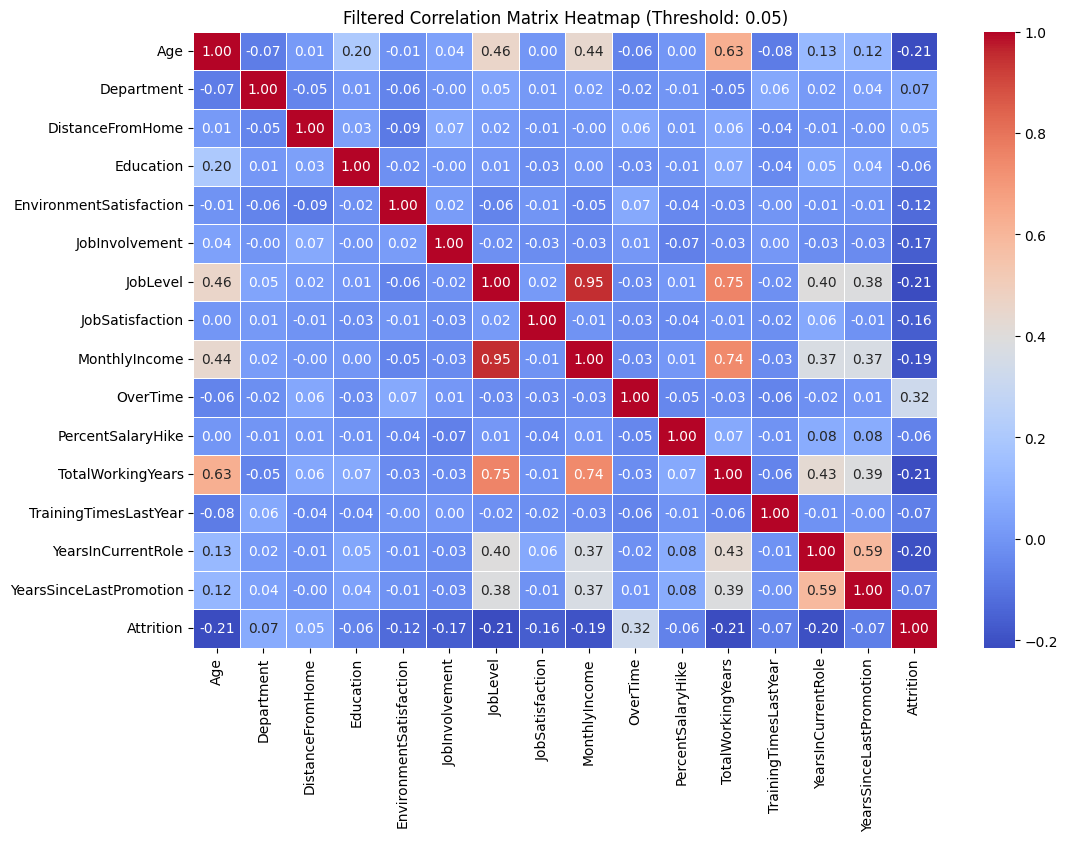

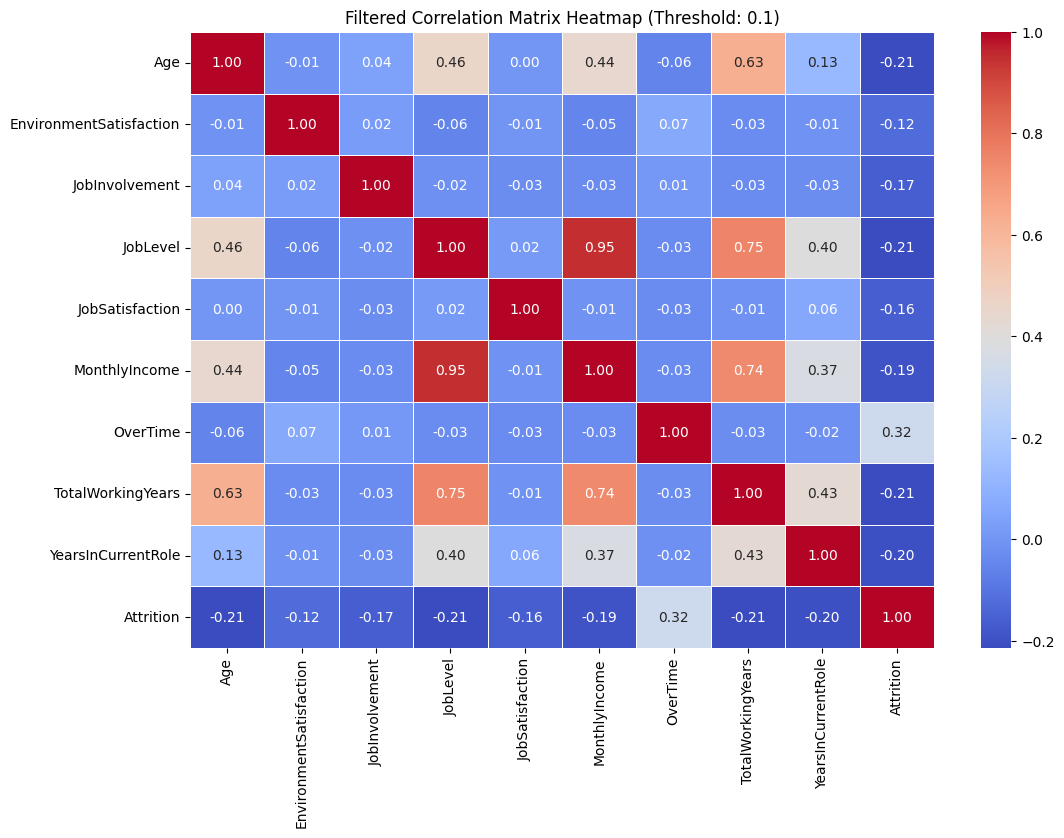

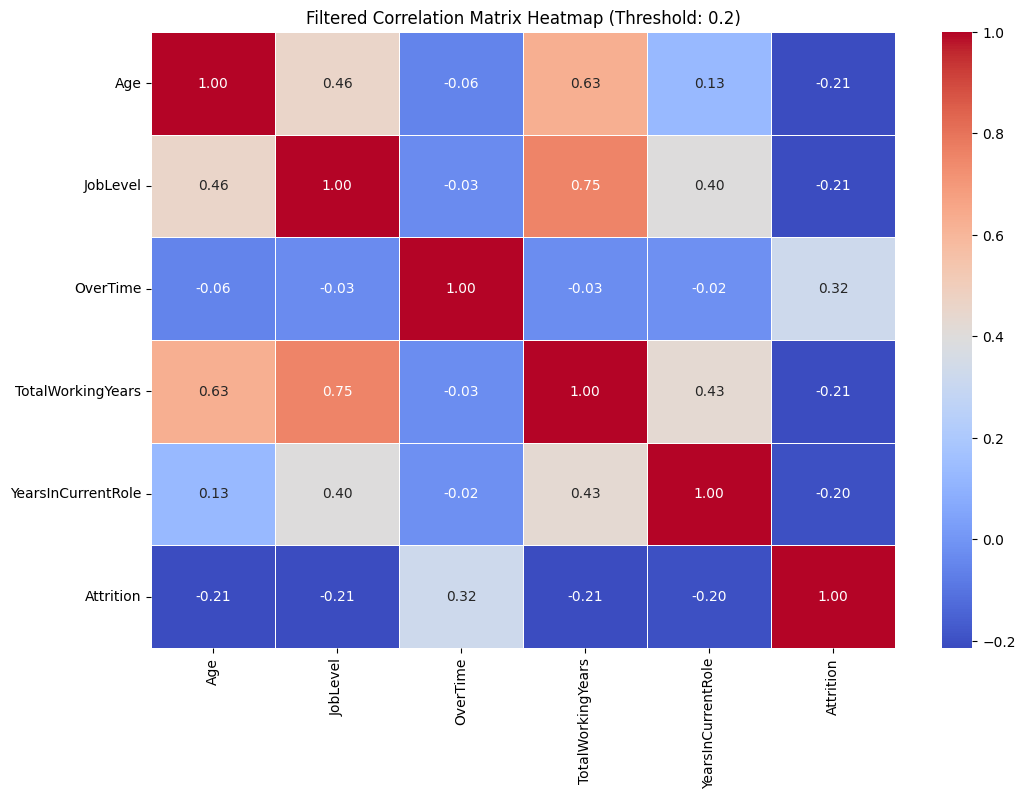

In [96]:
run_att_corr(EmpleadosAttrition)

Hasta el momento yo me quedaría con la correlación intermedia 1.0 ya que esta captura la mayor cantidad de parametros verdaderamnte centralizados al originalmente tener un espectro de relaciones entre -1 y 1. Dependiendo de los sigientes pasos podremos decidir si esta aseveración fue acertada o no. 

4. Analiza la información proporcionada, si detectaste que no se cuenta con los años que el empelado lleva en la compañía y parece ser un buen dato. Dicha cantidad se puede calcular con la fecha de contratación ‘HiringDate’.

5. Crea una columna llamada Year y obtén el año de contratación del empleado a partir de su fecha ‘HiringDate’. No se te olvide que debe ser un entero.

6. Crea una columna llamada YearsAtCompany que contenga los años que el empleado lleva en la compañía hasta el año 2018. Para su cálculo, usa la variable Year que acabas de crear.

In [97]:
EmpleadosAttrition['HiringDate'] = pd.to_datetime(EmpleadosAttrition['HiringDate'], errors='coerce')
EmpleadosAttrition['Year'] = EmpleadosAttrition['HiringDate'].dt.year
EmpleadosAttrition['Year'] = EmpleadosAttrition['Year'].fillna(0).astype(int)
EmpleadosAttrition['YearsAtCompany'] = (2018 - EmpleadosAttrition['Year']).astype(int)

display(EmpleadosAttrition[['HiringDate', 'Year', 'YearsAtCompany']].head())

,HiringDate,Year,YearsAtCompany
0,2013-06-06,2013,5
1,2015-12-25,2015,3
2,2017-02-14,2017,1
3,2010-07-29,2010,8
4,2011-10-07,2011,7


7. La DistanceFromHome está dada en kilómetros, pero tiene las letras “km” al final y así no puede ser entera.

8. Renombra la variable DistanceFromHome a DistanceFromHome_km.

9. Crea una nueva variable DistanceFromHome que sea entera, es decir, solo con números.

In [98]:
EmpleadosAttrition.rename(columns={'DistanceFromHome': 'DistanceFromHome_km'}, inplace=True)
EmpleadosAttrition['DistanceFromHome'] = EmpleadosAttrition['DistanceFromHome_km'].str.replace(' km', '').astype(int)

display(EmpleadosAttrition[['DistanceFromHome_km', 'DistanceFromHome']].head())

,DistanceFromHome_km,DistanceFromHome
0,1 km,1
1,6 km,6
2,7 km,7
3,7 km,7
4,15 km,15


10. Borra las columnas Year, HiringDate y DistanceFromHome_km debido a que ya no son útiles.

In [99]:
EmpleadosAttrition.drop(columns=['Year', 'HiringDate', 'DistanceFromHome_km'], inplace=True)

11. Aprovechando los ajustes que se están haciendo, la empresa desea saber si todos los departamentos tienen un ingreso promedio similar. Genera una nuevo frame llamado SueldoPromedioDepto que contenga el MonthlyIncome promedio por departamento de los empleados y colócalo en una variable llamada SueldoPromedio. Esta tabla solo es informativa, no la vas a utilizar en el set de datos que estás construyendo

In [100]:
SueldoPromedioDepto = EmpleadosAttrition.groupby('Department')['MonthlyIncome'].mean().reset_index()
SueldoPromedioDepto.rename(columns={'MonthlyIncome': 'SueldoPromedio'}, inplace=True)

display(SueldoPromedioDepto)

,Department,SueldoPromedio
0,Human Resources,6239.888889
1,Research & Development,6804.149813
2,Sales,7188.250000


12. La variable MonthlyIncome tiene un valor numérico muy grande comparada con las otras variables. Escala dicha variable para que tenga un valor entre 0 y 1.

In [101]:
scaler = MinMaxScaler()
EmpleadosAttrition['MonthlyIncomeScaled'] = scaler.fit_transform(EmpleadosAttrition[['MonthlyIncome']])

display(EmpleadosAttrition[['MonthlyIncome', 'MonthlyIncomeScaled']].head())

,MonthlyIncome,MonthlyIncomeScaled
0,17399,0.864269
1,4941,0.207340
2,2679,0.088062
3,10445,0.497574
4,13610,0.664470


13. Todo parece indicar que las variables categóricas que quedan sí son importantes para obtener la variable de salida. <br>
Convierte todas las variables categóricas que quedan a numéricas: 

    a) BusinessTravel <br>
    b) Department <br>
    c) EducationField <br>
    d) Gender <br>
    e) JobRole <br>
    f) MaritalStatus <br>
    g) Attrition <br>

In [102]:
EmpleadosAttrition = pd.get_dummies(EmpleadosAttrition, 
                                    columns=['BusinessTravel', 'Department', 'EducationField', 
                                             'Gender', 'JobRole', 'MaritalStatus', 'Attrition'],
                                    drop_first=True)

display(EmpleadosAttrition.head())

,Age,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition_Yes
0,50,2,1,997,4,3,4,4,17399,9,...,False,False,False,True,False,False,False,False,False,False
1,36,2,1,178,2,3,2,2,4941,6,...,False,False,True,False,False,False,False,False,False,False
2,21,1,1,1780,2,3,1,2,2679,1,...,False,False,False,False,False,False,True,False,True,True
3,52,4,1,1118,2,3,3,2,10445,7,...,False,False,False,False,False,False,False,False,True,False
4,33,1,1,582,2,3,3,3,13610,7,...,False,True,False,False,False,False,False,True,False,True


14. Ahora debes hacer la evaluación de las variables para quedarte con las mejores. <br>
Calcula la correlación lineal de cada una de las variables con respecto al Attrition.

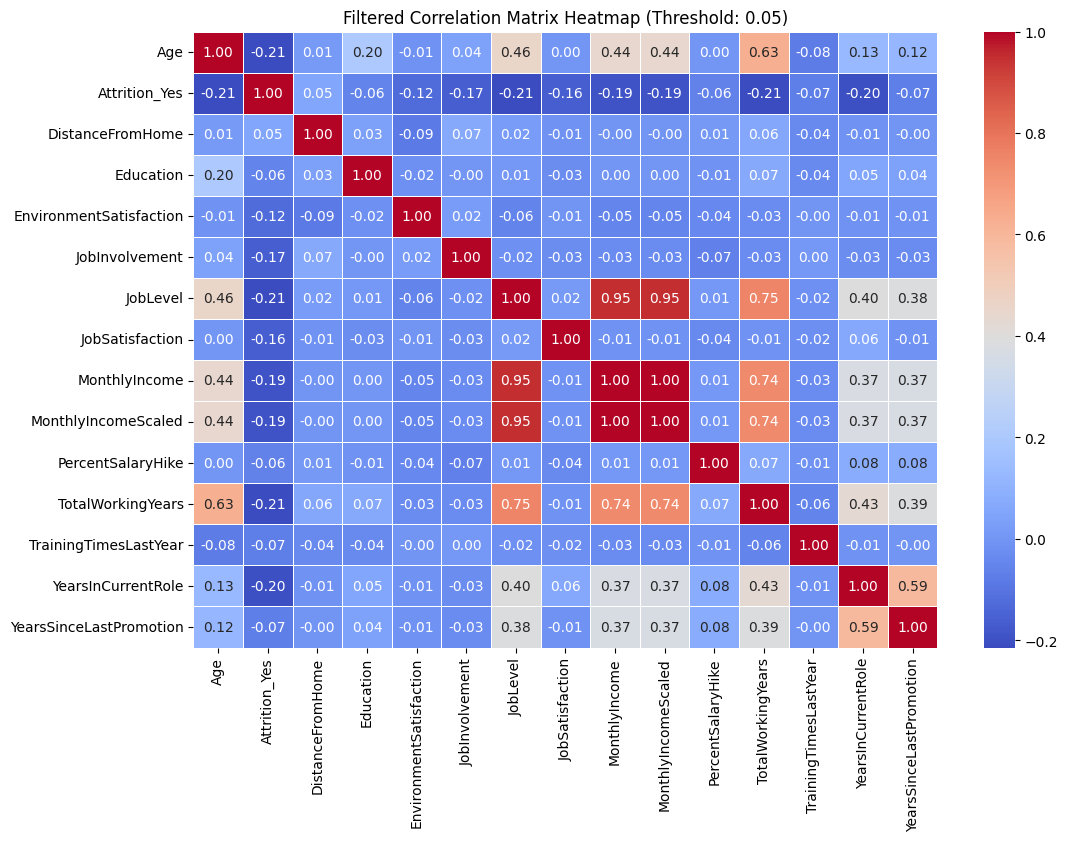

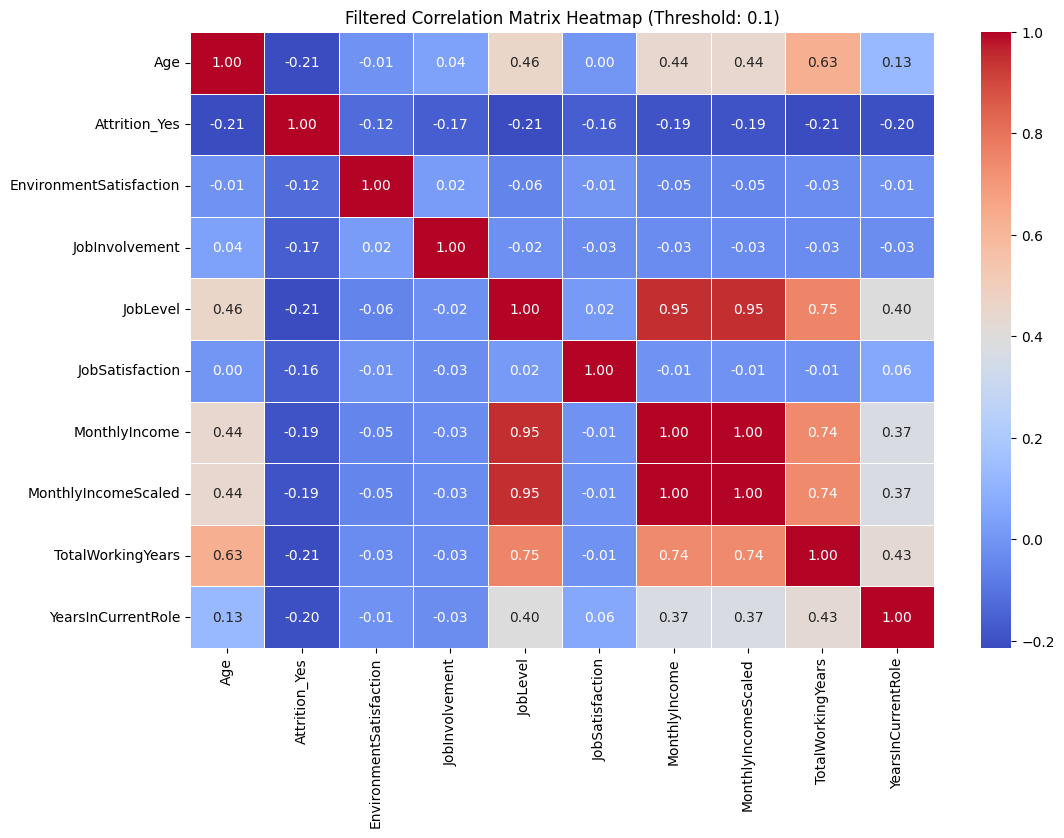

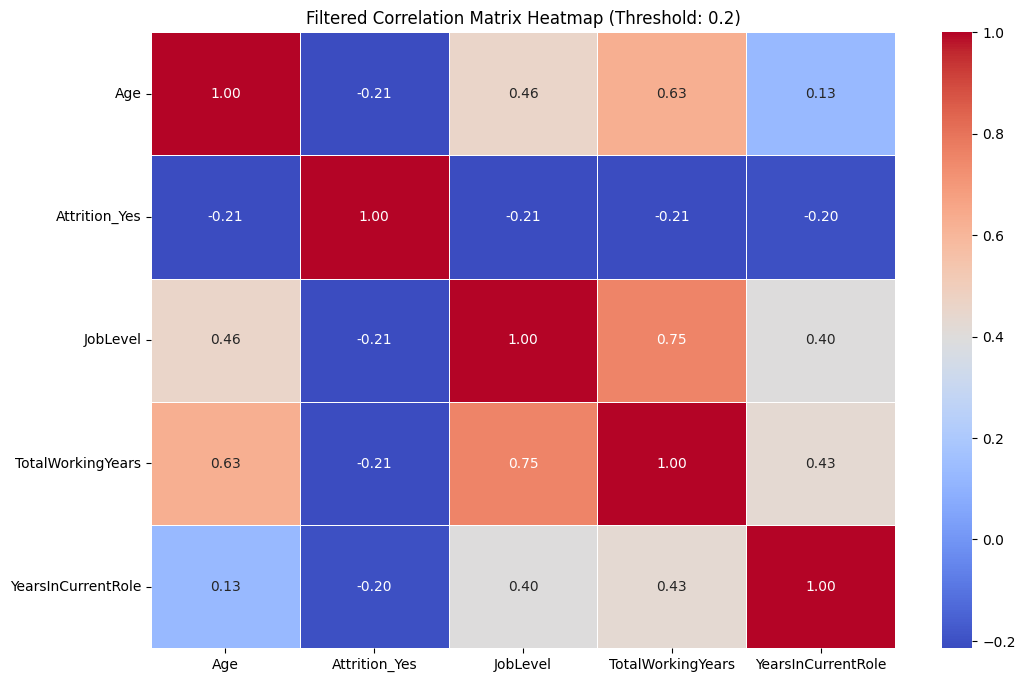

In [103]:
run_att_corr(EmpleadosAttrition, y= 'Attrition_Yes' ,case=0)

15. Selecciona solo aquellas variables que tengan una correlación mayor o igual a 0.1, dejándolas en otro frame llamado EmpleadosAttritionFinal. No olvides mantener la variable de salidaAttrition; esto es equivalente a borrar las que no cumplen con el límite.

In [104]:
correlation_matrix = EmpleadosAttrition.corr()
selected_columns = correlation_matrix.index[correlation_matrix['Attrition_Yes'].abs() >= 0.1].tolist()
EmpleadosAttritionFinal = EmpleadosAttrition[selected_columns]

print("Columnas seleccionadas para EmpleadosAttritionFinal:", selected_columns)
print(EmpleadosAttritionFinal.head())

Columnas seleccionadas para EmpleadosAttritionFinal: ['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'MonthlyIncomeScaled', 'EducationField_Technical Degree', 'JobRole_Laboratory Technician', 'JobRole_Research Director', 'JobRole_Sales Representative', 'MaritalStatus_Single', 'Attrition_Yes']
   Age  EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0   50                        4               3         4                4   
1   36                        2               3         2                2   
2   21                        2               3         1                2   
3   52                        2               3         3                2   
4   33                        2               3         3                3   

   MonthlyIncome  TotalWorkingYears  YearsInCurrentRole  MonthlyIncomeScaled  \
0          17399                 32                   4      

16. Crea una nueva variable llamada EmpleadosAttritionPCA formada por los componentes principales del frame EmpleadosAttritionFinal. Recuerda que el resultado del proceso PCA es un numpy array, por lo que, para hacer referencia a una columna, por ejemplo, la 0, puedes usar la instrucción EmpleadosAttritionPCA[:,0]).

In [105]:
scaler = StandardScaler()
EmpleadosAttritionFinal_scaled = scaler.fit_transform(EmpleadosAttritionFinal)

pca = PCA()
EmpleadosAttritionPCA = pca.fit_transform(EmpleadosAttritionFinal_scaled)

print("Componentes principales (primeras 5 observaciones):")
display(EmpleadosAttritionPCA[:5, :])

Componentes principales (primeras 5 observaciones):


array([[ 5.00584935e+00, -3.01869509e-01, -3.40378405e-01,
        -6.79751598e-01, -2.17981767e-01,  2.61311542e-01,
        -2.85597025e-01,  9.51694965e-01, -2.05314401e+00,
         1.10759929e+00,  3.38254364e-01,  8.80951630e-01,
         1.06962486e+00, -2.43007490e-01,  1.22013366e-15],
       [-7.46865910e-01, -3.94950472e-01, -2.09337119e-01,
        -2.41604292e-01,  8.32013659e-01, -3.32598088e-01,
         2.24722819e-01, -8.69879739e-01, -2.55175149e-01,
        -7.60938469e-01, -2.35125297e-01, -1.09934314e-01,
        -1.36786799e-01,  1.92147428e-01, -4.77231938e-16],
       [-3.53957746e+00,  3.78410370e+00, -6.05619134e-01,
        -1.76844733e+00,  6.80698890e-01, -2.14207638e-01,
        -4.13064820e-01, -2.32816712e-01,  7.92789418e-02,
         1.17110766e+00,  1.07638066e+00, -4.24674740e-01,
         5.77112464e-02, -2.76653701e-02, -4.84762092e-17],
       [ 1.79087212e+00,  4.35673446e-01, -8.41583983e-01,
        -3.45923856e-01, -1.49127775e-01, -1.05162906

17. Agrega el mínimo número de Componentes Principales en columnas del frame EmpleadosAttritionPCA que logren explicar el 80% de la varianza, al frame EmpleadosAttritionFinal. Puedes usar la instrucción assign, columna por columna, llamando a cada unaC0, C1, etc., hasta las que vayas a agregar.

In [106]:
pca = PCA(n_components=0.80)
EmpleadosAttritionPCA_reduced = pca.fit_transform(EmpleadosAttritionFinal_scaled)

n_components = pca.n_components_
print(f"El número de componentes que explican el 80% de la varianza es: {n_components}")

pca_columns = [f'C{i}' for i in range(n_components)]
EmpleadosAttritionPCA_df = pd.DataFrame(EmpleadosAttritionPCA_reduced, columns=pca_columns)

EmpleadosAttritionFinal = EmpleadosAttritionFinal.assign(**EmpleadosAttritionPCA_df)

display(EmpleadosAttritionFinal.head())

El número de componentes que explican el 80% de la varianza es: 8


,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,YearsInCurrentRole,MonthlyIncomeScaled,EducationField_Technical Degree,...,MaritalStatus_Single,Attrition_Yes,C0,C1,C2,C3,C4,C5,C6,C7
0,50,4,3,4,4,17399,32,4,0.864269,False,...,False,False,5.005849,-0.301870,-0.340378,-0.679752,-0.217982,0.261312,-0.285597,0.951695
1,36,2,3,2,2,4941,7,2,0.207340,False,...,False,False,-0.746866,-0.394950,-0.209337,-0.241604,0.832014,-0.332598,0.224723,-0.869880
2,21,2,3,1,2,2679,1,0,0.088062,False,...,True,True,-3.539577,3.784104,-0.605619,-1.768447,0.680699,-0.214208,-0.413065,-0.232817
3,52,2,3,3,2,10445,18,6,0.497574,False,...,True,False,1.790872,0.435673,-0.841584,-0.345924,-0.149128,-1.051629,0.841251,0.560061
4,33,2,3,3,3,13610,15,6,0.664470,False,...,False,True,1.353332,1.218227,0.081001,0.750396,0.376081,-0.274282,-0.348808,0.068192


18. Guarda el set de datos que has formado y que tienes en EmpleadosAttritionFinal en un archivo CSV llamado EmpleadosAttritionFinal.csv.

In [107]:
EmpleadosAttritionFinal.to_csv('EmpleadosAttritionFinal.csv', index=False)